In [1]:
#3º Tecnica Cluster com método K-means.

In [2]:
#Nosso objetivo é agrupar as variaveis e traçar nosso perfil de cliente

In [3]:
import pandas as pd
import numpy as np
import plotly.express as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
dataset = pd.read_csv("dataset_tratado.csv", sep =",")

In [5]:
dataset.head(2)

,ID,Age,AgeClass,Education,MaritalStatus,Children,Income,IncomeClass,Wines,Fruits,Meat,Fish,Sweet,Gold,TotalExpense,NumWeb,NumCatalog,NumStore,Cmp1,Cmp2
0,5524,68,BB-Others,Graduation,Single,0,58138.0,Medium,635,88,546,172,88,88,1617,8,10,4,0,0
1,2174,71,BB-Others,Graduation,Single,2,46344.0,Low,11,1,6,2,1,6,27,1,1,2,0,0


In [6]:
#Transformação de código das variáveis a valores numéricos. 

In [7]:
le = LabelEncoder()
dataset["IncomeClass"] = le.fit_transform(dataset["IncomeClass"])
dataset["AgeClass"] = le.fit_transform(dataset["AgeClass"])
dataset["Education"] = le.fit_transform(dataset["Education"])
dataset["MaritalStatus"] = le.fit_transform(dataset["MaritalStatus"])

In [8]:
#estudo da normalidade

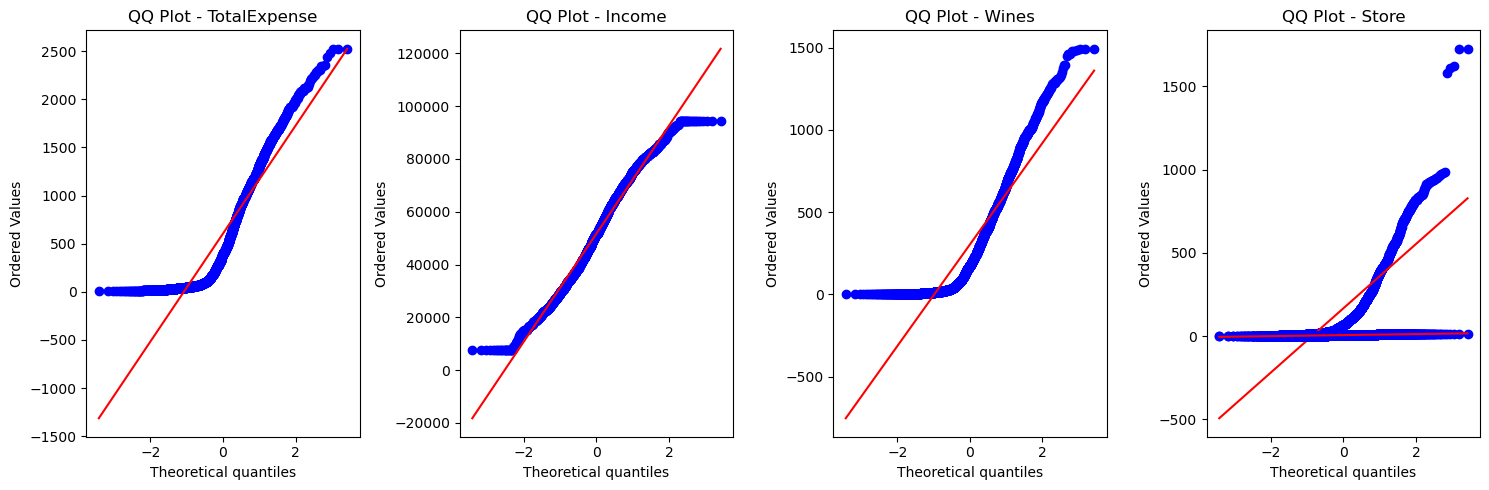

In [9]:
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
stats.probplot(dataset["TotalExpense"], dist="norm", plot=axes[0])
axes[0].set_title("QQ Plot - TotalExpense")
stats.probplot(dataset["Income"], dist="norm", plot=axes[1])
axes[1].set_title("QQ Plot - Income")
stats.probplot(dataset["Wines"], dist="norm", plot=axes[2])
axes[2].set_title("QQ Plot - Wines")
stats.probplot(dataset["Meat"], dist="norm", plot=axes[3])
axes[3].set_title("QQ Plot - Meat")
stats.probplot(dataset["NumStore"], dist="norm", plot=axes[3])
axes[3].set_title("QQ Plot - Store")
plt.tight_layout()
plt.show()

In [10]:
#algumas variáveis não aportavam valores consideráveis para a análise (desvio padrão era 0), por tanto foram removidas da análises. 

In [11]:
print(dataset[["Income", "Age", "Education", "Wines", "Meat", "Fruits", "Gold", "Sweet", "Fish", "NumWeb", "NumStore", "NumCatalog","Cmp1", "Cmp2"]].std())

Income        20592.869806
Age              11.701917
Education         1.122758
Wines           336.574382
Meat            225.661158
Fruits           39.715972
Gold             52.054318
Sweet            41.293949
Fish             54.639909
NumWeb            2.779461
NumStore          3.250940
NumCatalog        2.923456
Cmp1              0.245469
Cmp2              0.115052
dtype: float64


In [12]:
#os dados seguem uma assimetria à direita, por tanto optamos por normalizar as variáveis primeiro, aplicando o método yeo-johnson. 

In [13]:
# Selecionando e normalizando os dados
columns = ["Income", "Age", "Education", "Wines", "Meat", "Fruits", "Gold", "Sweet", "Fish", "NumWeb", "NumStore", "NumCatalog"]
X = dataset[columns]
pt = PowerTransformer(method="yeo-johnson")
X_transformed = pt.fit_transform(X)

#Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_transformed)

In [14]:
#aplicamos a técnica de PCA para reduzir a duas dimensões já que temos muitas variáveis, utilizamos X_Scaled.

In [15]:
#O primeiro componente principal explica cerca de 55.7% da variabilidade total nos dados, contendo a maior parte das variações em seu conjunto de dados, o segundo componente explica cerca de 13% da variabilidade dos dados restantes. 
#Esses dois componentes juntos explicam cerca de 68.7% da variabilidade nos dados. 
#Isso significa que, ao usar apenas esses dois componentes para a redução de dimensionalidade, perdemos aprox. 31.3% das informações presentes nas variáveis originais.

In [16]:
#PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
print(pca.explained_variance_ratio_)
# Adicionando as componentes principais ao dataset
dataset['PCA1'] = X_pca[:, 0]
dataset['PCA2'] = X_pca[:, 1]

[0.55657262 0.13007109]


In [17]:
#Cluster método K-Means com 3 clusters.
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


In [18]:
# Adicionando o resultado ao dataset
dataset['kmeans_Cluster'] = labels

# Resumo das médias por cluster
cluster_summary = dataset.groupby('kmeans_Cluster')[columns].mean()

In [19]:
dataset.head(2)

,ID,Age,AgeClass,Education,MaritalStatus,Children,Income,IncomeClass,Wines,Fruits,...,Gold,TotalExpense,NumWeb,NumCatalog,NumStore,Cmp1,Cmp2,PCA1,PCA2,kmeans_Cluster
0,5524,68,0,2,2,0,58138.0,2,635,88,...,88,1617,8,10,4,0,0,-3.49774,0.536081,1
1,2174,71,0,2,2,2,46344.0,1,11,1,...,6,27,1,1,2,0,0,2.97805,-0.496285,0


In [20]:
print(cluster_summary)

                      Income        Age  Education       Wines        Meat  \
kmeans_Cluster                                                               
0               32587.132308  52.560276   2.214696   25.048220   21.437428   
1               71080.995652  56.878261   2.267081  567.428571  368.828571   
2               53708.260107  60.472371   2.859180  359.074866  103.055258   

                   Fruits       Gold      Sweet       Fish    NumWeb  \
kmeans_Cluster                                                         
0                3.753157  12.861079   4.218140   5.300804  1.815155   
1               61.645963  79.845963  63.152795  88.016149  5.624845   
2               10.468806  40.784314  10.768271  15.096257  5.408200   

                NumStore  NumCatalog  
kmeans_Cluster                        
0               2.910448    0.430540  
1               8.612422    5.222360  
2               6.228164    2.454545  


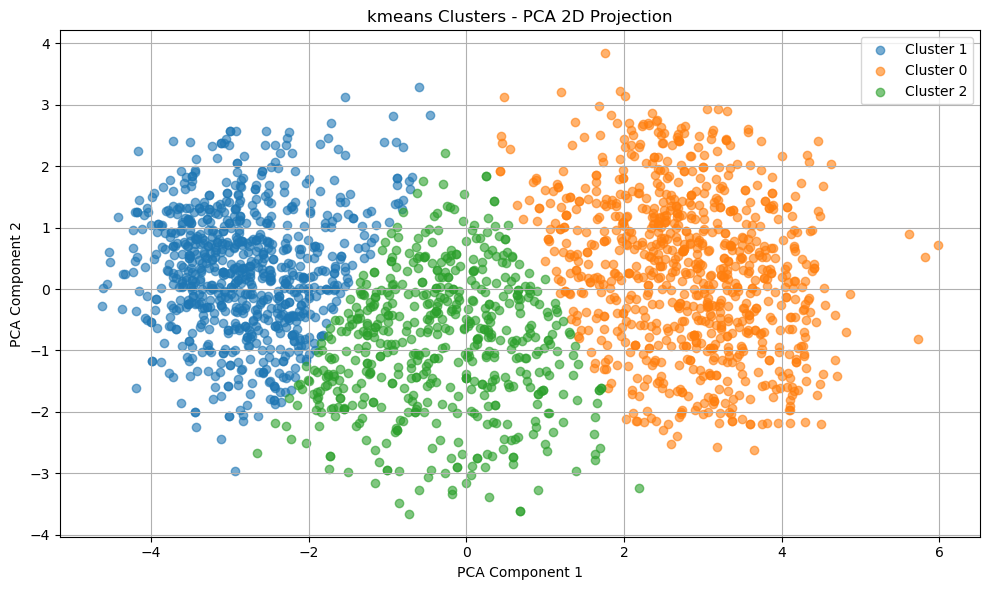

In [21]:
# Plotar os clusters
plt.figure(figsize=(10, 6))
for cluster in dataset['kmeans_Cluster'].unique():
    subset = dataset[dataset['kmeans_Cluster'] == cluster]
    plt.scatter(subset['PCA1'], subset['PCA2'], label=f'Cluster {cluster}', alpha=0.6)

#Grafico componentes 
plt.title('kmeans Clusters - PCA 2D Projection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
#Grupo 1, contém 871 dados, podemos ver que aqui não se agruparam variáveis que tenham relevância para o cluster, apenas variáveis que possuem uma média pequena. 
#Grupo 2, contém 805 dados, aqui sim, as variáveis como salário e produtos, que não tinham importância para o cluster anterior, parecem neste grupo. 
#Grupo 3, contém 561 dados, possui uma variável em destaque que é NumWeb, ou seja, compras realizadas na página web. Já os produtos aparecem sem relevância para este cluster. 

In [23]:
# contagem de dados por cluster
clusters = kmeans.labels_
df_labels = pd.DataFrame(clusters, columns=[""])
cluster_counts = df_labels.value_counts().reset_index()
cluster_counts.columns = ["Cluster", "Quantidade"]

print("Distribuição de dados por cluster (Kmeans):")
print(cluster_counts)

Distribuição de dados por cluster (Kmeans):
   Cluster  Quantidade
0        0         871
1        1         805
2        2         561


In [24]:
#Média geral de cada variável
global_mean = cluster_summary.mean()

#Função para identificar variáveis relevantes em um cluster
def get_relevant_features(cluster_row, threshold=1.2):
    high_vars = []
    low_vars = []
    for col in cluster_row.index:
        cluster_val = cluster_row[col]
        mean_val = global_mean[col]

        if cluster_val > mean_val * threshold:
            high_vars.append(col)
        elif cluster_val < mean_val / threshold:
            low_vars.append(col)
    
    return high_vars, low_vars

#Montagem da tabela descritiva
summary = []

for profile_name, row in cluster_summary.iterrows():
    highs, lows = get_relevant_features(row)
    summary.append({
        "Cluster": profile_name,
        "Variáveis em destaque (ALTAS)": ', '.join(highs),
        "Variáveis em destaque (BAIXAS)": ', '.join(lows)
    })

summary_df = pd.DataFrame(summary)

#Tabela
display(summary_df)

,Cluster,Variáveis em destaque (ALTAS),Variáveis em destaque (BAIXAS)
0,0,,"Income, Wines, Meat, Fruits, Gold, Sweet, Fish..."
1,1,"Income, Wines, Meat, Fruits, Gold, Sweet, Fish...",
2,2,NumWeb,"Meat, Fruits, Sweet, Fish"


In [25]:
#metrica silhouette indica que os clusters são distintos mas, não tão bem definidos, o que sugere não ser uma separação tão clara. 

In [26]:
score = silhouette_score(X_pca, labels)
print(f"Silhouette Score: {score:.2f}")

Silhouette Score: 0.44


In [27]:
#O método cotovelo indica que deveríamos considerar 6 cluster para agrupar os dados

C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\gsous\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

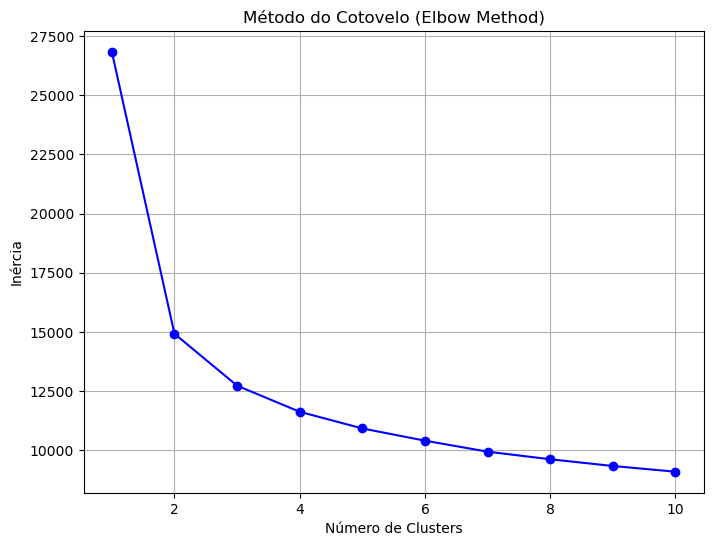

In [28]:
# Número de clusters variando de 1 a 10
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # A inércia para cada k

# Plotando o Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o', color='b')
plt.title('Método do Cotovelo (Elbow Method)')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.grid(True)
plt.show()

In [29]:
#Conclusão: Analisando os aspectos dos tres cluster, podemos perceber que dois perfis se desenham,
#1º perfil, onde o salário e produtos como vinho e carne estão agrupados.
#2º perfil, é a clara preferência por fazer compra na página web.
# Por fim, seria interessante realizar novas análises com diferentes números de cluster até mesmo considerar outros métodos. 